In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. 전처리

In [4]:
titanic.info()
# 모든 승객은에게 PassengerID가 부여되었을 것. PassengerID는 891개로 확인 되므로 이를 기준으로 나머지 컬럼의 데이터 개수 확인.
# Age, Cabin, Embarked에는 null이 있는 것을 알 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
describe = titanic['Age'].describe()
age_head = titanic['Age'].head()

print('Age statistics :\n', describe)
print(' ')
print('Age first 5 data :\n', age_head)

Age statistics :
 count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
 
Age first 5 data :
 0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64


In [6]:
# - Age의 빈 값은 전체 나이 평균으로 채움. 소수 점으로 되어 있는 나이는 올림.
titanic['Age'].fillna(value=titanic['Age'].mean(), inplace=True)
titanic['Age'] = np.ceil(titanic['Age']).astype(int)

In [7]:
bins = [0, 10, 20, 80]
labels = ['child', 'teen', 'adult']
titanic['age_range'] = pd.cut(titanic['Age'], bins=bins, labels=labels)

In [8]:
titanic['Age'].tail()

886    27
887    19
888    30
889    26
890    32
Name: Age, dtype: int32

In [9]:
cabin_unique = titanic['Cabin'].unique()
cabin_head = titanic['Cabin'].head(10)

print('Cabin kinds :\n', cabin_unique)
print(' ')
print('Cabin first 10 data :\n', cabin_head)

Cabin kinds :
 [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
 
Cabin first 10 data :
 0  

In [10]:
# - Cabin은 빈 값이 너무 많고 어떤 기준으로 채워야할지 모르겠어서 컬럼 제거.
titanic.drop(columns='Cabin', inplace=True)

In [11]:
embarked_unique = titanic['Embarked'].unique()

print('Embarked kinds :\n', embarked_unique)

Embarked kinds :
 ['S' 'C' 'Q' nan]


In [12]:
# Embarked가 null인 row는 두개 밖에 없어서 어떤 건지 확인
titanic[titanic['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_range
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,NaN,adult
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,NaN,adult


In [13]:
# 결과로 나온 두사람 외에 같은 Ticket 번호 갖고 있는 사람 있는지 확인.
# Ticket 컬럼의 data type은 object
titanic[titanic['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_range
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,NaN,adult
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,NaN,adult


In [14]:
# Name의 성만 남겨서 결과로 나온 두사람과 같은 성을 가진 사람 있는지 확인.
titanic['Name'] = titanic['Name'].str.split(',').str[0]
titanic[(titanic['Name'] == 'Icard') | (titanic['Name'] == 'Stone')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_range
61,62,1,1,Icard,female,38,0,0,113572,80.0,NaN,adult
829,830,1,1,Stone,female,62,0,0,113572,80.0,NaN,adult


In [15]:
# 사람들이 가장 많이 탑승한 곳을 찾기 위해 count 컬럼 추가해서 Embared 종류별 탑승 인원 확인
titanic['count'] = 1
titanic.groupby(['Embarked']).sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,count
Embarked,,,,,,,,
C,74820,93,317,5150,65,61,10072.2962,168
Q,32178,30,224,2258,33,13,1022.2543,77
S,289496,217,1514,19018,368,266,17439.3988,644


In [16]:
titanic['Embarked'].fillna(value='S', inplace=True)

In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
 11  age_range    891 non-null    category
 12  count        891 non-null    int64   
dtypes: category(1), float64(1), int32(1), int64(6), object(4)
memory usage: 81.1+ KB


2. EDA

In [18]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_range,count
0,1,0,3,Braund,male,22,1,0,A/5 21171,7.2500,S,adult,1
1,2,1,1,Cumings,female,38,1,0,PC 17599,71.2833,C,adult,1
2,3,1,3,Heikkinen,female,26,0,0,STON/O2. 3101282,7.9250,S,adult,1
3,4,1,1,Futrelle,female,35,1,0,113803,53.1000,S,adult,1
4,5,0,3,Allen,male,35,0,0,373450,8.0500,S,adult,1
5,6,0,3,Moran,male,30,0,0,330877,8.4583,Q,adult,1
6,7,0,1,McCarthy,male,54,0,0,17463,51.8625,S,adult,1
7,8,0,3,Palsson,male,2,3,1,349909,21.0750,S,child,1
8,9,1,3,Johnson,female,27,0,2,347742,11.1333,S,adult,1
9,10,1,2,Nasser,female,14,1,0,237736,30.0708,C,teen,1


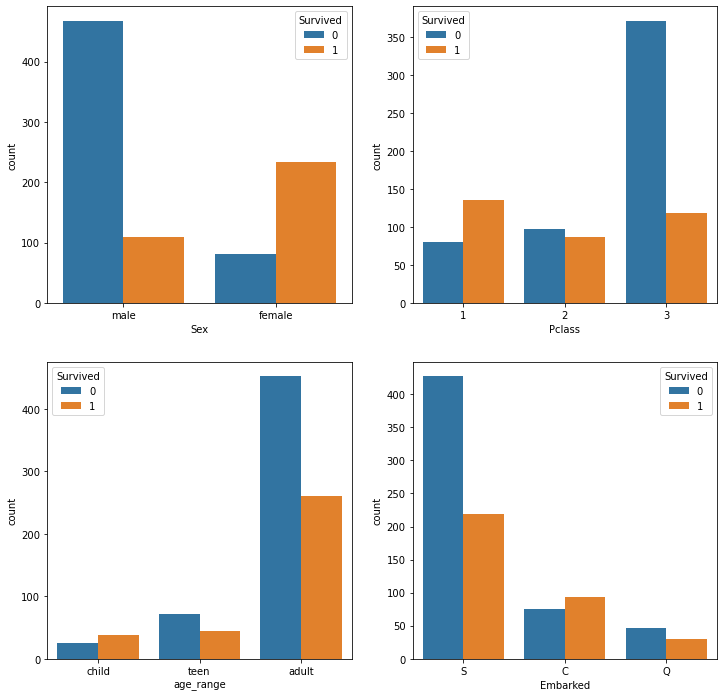

In [19]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.countplot(x='Sex', hue='Survived', data=titanic)

ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.countplot(x='Pclass', hue='Survived', data=titanic)

ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.countplot(x='age_range', hue='Survived', data=titanic)

ax4 = fig.add_subplot(2, 2, 4)
ax4 = sns.countplot(x='Embarked', hue='Survived', data=titanic)
plt.show()

In [22]:
import os

os.makedirs('datas', exist_ok=True)
titanic.to_csv('datas/titanic_rev.csv', index=False)